# App Behavior Analysis

* Source
    [Machine Learning - Get Your Hands Dirty by Solving Real Industry Challenges with Python](https://nlbsg.udemy.com/course/machine-learning-practical/learn/lecture/11839244#overview)

## Data
* Customer app behavior data
  * Includes
    * Date & time of App installation
    * App features that user engaged
  * Time Range
    * User's 1st day in the app (24 hour free trial)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [32]:
%matplotlib inline

## Import Source Data

In [22]:
app_data_df = pd.read_csv("dataset/P39-CS3-Data/appdata10.csv")
app_data_df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [23]:
top_screens_df = pd.read_csv("dataset/P39-CS3-Data/top_screens.csv")
top_screens_df.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


## EDA
* [Data Cleaning](#data-cleaning)
* [Features Distributions](#feature-distributions)

In [24]:
app_data_df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Get type of each column
app_data_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

### Data Cleaning
* Convert col types
* Drop the unwanted cols

In [26]:
app_data_df['hour'].head()

0     02:00:00
1     01:00:00
2     19:00:00
3     16:00:00
4     18:00:00
Name: hour, dtype: object

In [27]:
app_data_df['hour'].str.slice(1, 3).head()

0    02
1    01
2    19
3    16
4    18
Name: hour, dtype: object

In [28]:
# Convert col `hour` from `Object` to `Int`
app_data_df['hour'] = app_data_df['hour'].str.slice(1, 3).astype(int).head()

In [30]:
# Drop the unwanted columns
app_data_df2 = app_data_df.copy().drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
app_data_df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2.0,23,15,0,0,0
1,6,1.0,24,13,0,0,0
2,1,19.0,23,3,0,1,1
3,4,16.0,28,40,0,0,0
4,1,18.0,31,32,0,0,1


### Feature Distributions

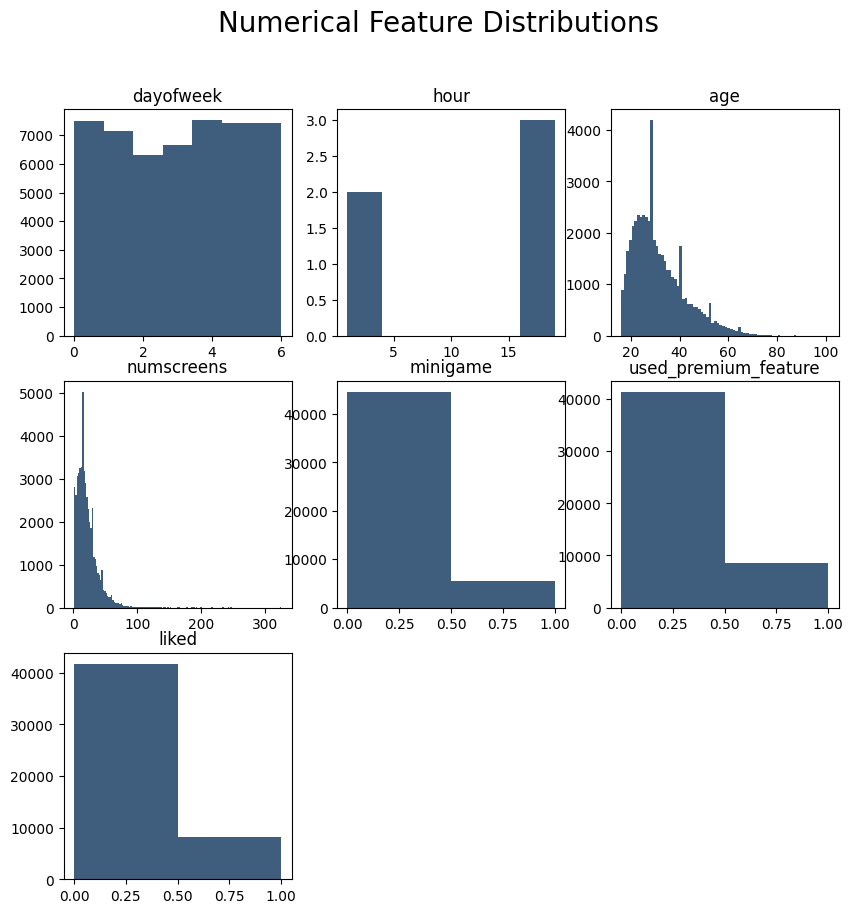

In [52]:
plt.figure(figsize=(10, 10))
plt.suptitle("Numerical Feature Distributions", fontsize=20)

for i in range(0, app_data_df2.shape[1]):
    plt.subplot(3, 3, i+1)
    f = plt.gca()
    f.set_title(app_data_df2.columns[i])

    unique_vals_size = np.size(app_data_df2.iloc[:, i].unique())
    plt.hist(app_data_df2.iloc[:, i], bins=unique_vals_size, color='#3F5D7D')

    
